<a href="https://colab.research.google.com/github/ifconfig68/POO_UCC/blob/main/Copia_de_11_POO_Relaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

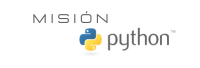

# Relaciones en la POO

En el mundo de la Programación Orientada a Objetos tenemos diferentes tipos de relaciones en las que cada una tiene un significado semántico y una consecuencia en código.  Veremos cómo implementar cada una de ellas en Python.

## Herencia

Le permite a una clase (subclase) heredar las características y el comportamiento de otra clase (superclase).

Sintaxis:



```
class Subclase (Superclase):
```
Ejemplo:

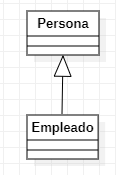

In [ ]:
class Persona:   #esta es la superclase

  def __init__(self, nombre, edad):  #constructor de la superclase
    self.__nombre = nombre
    self.__edad = edad

  def cumplir_anos(self):
    self.__edad += 1

  def devolver_nombre(self):
    return self.__nombre

  def devolver_edad(self):
    return self.__edad
######################################################################
class Empleado(Persona):  #esta es la subclase Empleado que hereda de Persona
  pass

###########################################
emp = Empleado ("Juan", 30)  #se crea un empleado (sublcase)
emp.cumplir_anos() #se llama al método heredado de la superclase
emp.salario = 1_500_000
print (f"nombre del empleado: {emp.devolver_nombre()}")
print (f"edad del empleado: {emp.devolver_edad()}")
print (f"salario del empleado: {emp.salario}")


### super()

**La función super()** permite acceder a los miembros de la superclase, entre ellos su constructor.

In [ ]:
class Persona:

  def __init__(self, nombre, edad):  #constructor de la superclase
    self.__nombre = nombre
    self.__edad = edad

  def cumplir_anos(self):
    self.__edad += 1

  def devolver_nombre(self):
    return self.__nombre

  def devolver_edad(self):
    return self.__edad

class Empleado(Persona):
  def __init__(self, nombre, edad, salario): #constructor de la subclase
    super().__init__(nombre, edad)  #envía el nombre y edad al constructor de la superclase
    self.__salario = salario

  def devolver_salario(self):
    return self.__salario

###########################################
emp = Empleado ("Juan", 30, 1_500_000)  #se crea un empleado (sublcase)
emp.cumplir_anos()
print (f"nombre del empleado: {emp.devolver_nombre()}")
print (f"edad del empleado: {emp.devolver_edad()}")
print (f"salario del empleado: {emp.devolver_salario()}")

### issubclass()

**issubclass()** es una función que nos permite comprobar si una clase es subclase de otra.  

In [ ]:
print (issubclass(Empleado, Persona))
print (issubclass(Persona, Empleado))

### Herencia múltiple

En Python la herencia múltiple es permitida y se define simplemente enviando varias superclases entre paréntesis al momento de crear una subclase



```
class Subclase (Superclase1, Superclase2, Superclase_n):
    pass
```



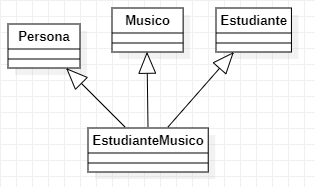

In [ ]:
class Persona:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

class Musico:
    def __init__(self, instrumento, genero):
        self.instrumento = instrumento
        self.genero = genero

class Estudiante:
    def __init__(self, escuela, promedio):
        self.escuela = escuela
        self.promedio = promedio

class EstudianteMusico(Persona, Musico, Estudiante):
    def __init__(self, nombre, edad, instrumento, genero, escuela, promedio):
        Persona.__init__(self, nombre, edad)
        Musico.__init__(self, instrumento, genero)
        Estudiante.__init__(self, escuela, promedio)

    def tocar_instrumento(self):
        print(f"{self.nombre} está tocando el {self.instrumento}.")

    def estudiar(self):
        print(f"{self.nombre} está estudiando en {self.escuela}.")

    def mostrar_promedio(self):
        print(f"{self.nombre} tiene un promedio de {self.promedio}.")
##########################################################################
est_musico = EstudianteMusico("Juan",28,"guitarra","balada","bellas artes",4.5)
est_musico.tocar_instrumento()
est_musico.estudiar()
est_musico.mostrar_promedio()

Cuando las superclases tienen los mismos métodos ¿cómo hace la subclase para saber cuál de los métodos debe invocar?

In [ ]:
class A:
  def metodo(self):
    print ("Soy el metodo de la clase A")

class B:
  def metodo(self):
    print ("Soy el metodo de la clase B")

class C(A, B):
  def llamada_metodo(self):
    A.metodo(self)   #A y B tienen el método (metodo()), a cuál llamará?
    B.metodo(self)

mi_c = C()
mi_c.llamada_metodo()

## Asociación

Una asociación es una relación semántica entre objetos y se da cuando un objeto conoce a otro objeto y por lo tanto puede acceder a su comportamiento.



### Asociaciones Unidireccionales

Si la asociación es unidireccional, solo el objeto A conoce al objeto B, pero si es bidireccional tanto A como B se conocen.  

En la siguiente asociación entre Persona y Vehiculo, la Persona conoce el Vehiculo y por lo tanto, puede acceder a su comportamiento, mas el Vehiculo no conoce a la Persona

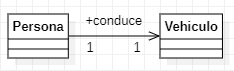

In [ ]:
class Vehiculo:
    def __init__(self, modelo):
        self.modelo = modelo

class Persona:
    def __init__(self, nombre):
        self.nombre = nombre
        self.vehiculo = None

    def comprar_vehiculo(self, vehiculo:Vehiculo):
        self.vehiculo = vehiculo

    def conducir_vehiculo(self):
        if self.vehiculo is not None:
            print(f"{self.nombre} está conduciendo un vehículo {self.vehiculo.modelo}")
        else:
            print(f"{self.nombre} no tiene un vehículo para conducir")
#########################################################################

persona1 = Persona("Juan")
vehiculo1 = Vehiculo("Toyota")
persona1.comprar_vehiculo(vehiculo1)
persona1.conducir_vehiculo()

persona2 = Persona("Pedro")
persona2.conducir_vehiculo()

### Asociaciones Bidireccionales

Si la asociación es bidireccional, el objeto A conoce al objeto B y el objeto B conoce al objeto A.  

En la siguiente asociación entre Persona y Celular, la Persona conoce el Celular asignado y por lo tanto, puede acceder a su comportamiento, además, el Celular conoce a la Persona (propietario).

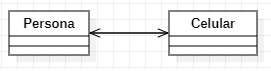

In [ ]:
class Persona:
    def __init__(self, nombre, celular=None):
        self.nombre = nombre
        if celular is not None:
            self.set_celular(celular)

    def set_celular(self, celular):
        self.celular = celular
        celular.set_propietario(self)

    def ver_info(self):
        if self.celular is not None:
            return f"{self.nombre} tiene el celular {self.celular.numero}"
        else:
            return f"{self.nombre} no tiene celular"


class Celular:
    def __init__(self, numero):
        self.numero = numero
        self.propietario = None

    def set_propietario(self, propietario:Persona):
        self.propietario = propietario

    def ver_info(self):
        if self.propietario is not None:
            return f"El celular {self.numero} pertenece a {self.propietario.nombre}"
        else:
            return f"El celular {self.numero} no tiene propietario"
#####################################################################
p = Persona ("Juan")
c = Celular (3002350020)
p.set_celular(c)
print(p.ver_info())
print(c.ver_info())

## Agregación

Una Agregación es una relación entre dos clases en la que una clase contiene una o varias instancias de otra clase como parte de su estructura. La clase que contiene las instancias de otra clase se llama clase contenedora o clase agregadora, mientras que la clase contenida se llama clase contenida o clase agregada.

En el siguiente ejemplo, una instancia de la clase Persona contiene varios objetos de tipo Celular

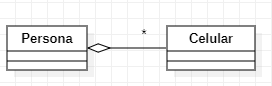

In [ ]:
class Celular:
    def __init__(self, numero):
        self.numero = numero

class Persona:
    def __init__(self, nombre):
        self.nombre = nombre
        self.celulares = []

    def agregar_celular(self, celular):
        self.celulares.append(celular)

    def mostrar_celulares(self):
        print ("celulares de ", self)
        for cel in self.celulares:
          print (cel.numero)

    def __str__(self):
      return self.nombre
#####################################################
p = Persona ("Juan")
c1 = Celular (300248)
c2 = Celular (320789)
c3 = Celular (311445)

p.agregar_celular(c1)
p.agregar_celular(c2)
p.agregar_celular(c3)

p.mostrar_celulares()

print (c1.numero)


Nótese que los objetos de tipo Celular existen por fuera de la clase Persona y su existencia no se limita a la existencia de la clase contenedora.

## Composición

En POO, la relación de composición es una relación entre dos clases en la que una clase contiene a otra clase como parte de su estructura y es responsable de crear y destruir las instancias de la clase contenida. La clase contenida no puede existir sin la clase contenedora y está completamente encapsulada dentro de ella.

En el siguiente ejemplo, los objetos de la clase Celular son creados en el constructor de la clase Persona, de esta manera no pueden existir de manera independiente y al eliminar una instancia de la clase Persona, se eliminarán todos los objetos Celular contenidos.



In [ ]:
class Celular:
    def __init__(self, numero):
        self.numero = numero

class Persona:
    def __init__(self, nombre, numero_cel):
        self.nombre = nombre
        self.celular = Celular(numero_cel)

    def ver_info(self):
      print (f"soy {self.nombre} y tengo un celular número {self.celular.numero}")
#################################################################
p = Persona("Juan", 300245)
p.ver_info()
print(celular.numero)

Ahora con varios celulares

In [ ]:
class Celular:
    def __init__(self, numero):
        self.numero = numero

class Persona:
    def __init__(self, nombre):
        self.nombre = nombre
        self.celulares=[]

    def agregar_celular(self, numero):
        self.celulares.append(Celular(numero))

    def mostrar_celulares(self):
        print ("celulares de ", self)
        for cel in self.celulares:
          print (cel.numero)

    def __str__(self):
      return self.nombre


p = Persona ("Pedro")
p.agregar_celular(320865)
p.agregar_celular(300546)
p.agregar_celular(310892)

p.mostrar_celulares()

print (f"El primer celular de {p.nombre} es {p.celulares[0].numero}")

# Apropiación

1.  A partir del siguiente diagrama:


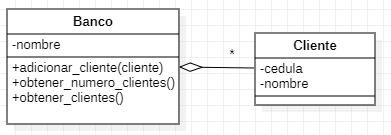

Cree las clases Banco y Cliente para que respondan al diagrama y agregue los elementos adicionales que se requieran para generar un menú con las siguientes opciones:



```
1. Crear Banco
2. Agregar Cliente a un Banco
3. Ver los clientes de un Banco
4. Obtener el número de clientes de un Banco
5. Salir
```



2. A partir del siguiente diagrama:

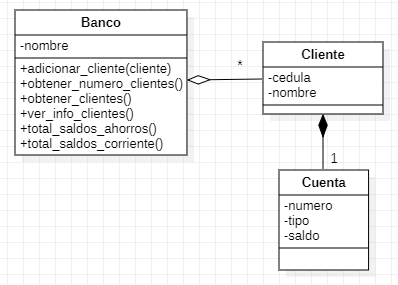

Realice los ajustes necesarios para que:


*   En la aplicación solo se pueda tener un único Banco, aunque se le puede cambiar su nombre en cualquier momento
*   Se pueda ver la información de todos los clientes del banco incluyendo su cédula, nombre, número de cuenta, tipo y saldo
*   Se pueda ver el total de los saldos en las cuentas de ahorros
*   Se pueda ver el total de los saldos en las cuentas corrientes



Modifique el menú para que quede de esta manera:



```
1. Crear/cambiar nombre Banco
2. Agregar Cliente a un Banco
3. Ver información clientes
4. Ver saldos totales cuentas de ahorros
5. Ver saldos totales cuentas corrientes
6. Salir
```



3. Implemente dos relaciones de herencia al ejercicio anterior creando una clase CuentaAhorro y otra CuentaCorriente que hereden de la clase Cuenta.  Elimine el atributo tipo de la clase Cuenta y agregue a la clase CuentaAhorro un atributo llamado interés con un método aplicar_interes que incrementa el saldo en el interés dado y a la CuentaCorriente incluir un atributo llamado descuento con un método aplicar_descuento que disminuye el saldo el descuento dado.  La aplicación debe continuar funcionando con los ajustes dados.

4.  -Ejercicio Adicional- A partir del siguiente diagrama:

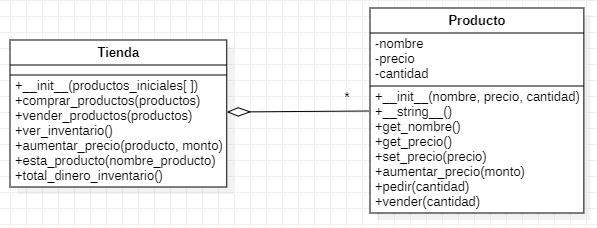

y teniendo en cuenta la descripción de los siguientes métodos:

* **comprar_productos:** Recibe un diccionario con el nombre del producto como
llave y la cantidad a comprar como valor y debe incrementar la cantidad
en el producto dado, si el producto no se encuentra en la tienda, se debe
incluir con un precio inicial de 0.
* **vender_productos**: Recibe un diccionario con el nombre del producto como
llave y la cantidad a vender como valor y debe disminuir la cantidad en
el producto dado, solo teniendo en cuenta a los productos que existen
en la tienda.
* **ver_inventario**: Muestra el nombre, precio y cantidad de todos los
productos que se encuentran en la tienda.
* **aumentar_Precio**: Aumenta el precio de un producto dado de acuerdo
con el monto a aumentar recibido.
* **esta_producto**: Recibe el nombre de un producto y retorna falso o
verdadero dependiendo si el producto se encuentra o no en el
inventario.
* **total_dinero_inventario**: Devuelve el valor del inventario teniendo en
cuenta los precios de los productos y las cantidades existentes.

Compruebe el funcionamiento del programa así:

*   Cree una tienda con 3 productos iniciales
*   Muestre el inventario inicial
*   Compre 20 unidades de un producto existente en la tienda
*   Compre 12 unidades de un producto que no exista en la tienda y defina su precio en un valor determinado
*  Muestre de nuevo el inventario
*  Venda 2 unidades de un producto existente
*  Intente vender 1 unidad de un producto inexistente haciendo uso del método esta_producto
Muestre de nuevo el inventario
*  Aumente el precio a un producto el 10% del precio actual
* Muestre de nuevo el inventario
*  Muestre el total de dinero del inventario.   

